In [459]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [460]:
import warnings
warnings.filterwarnings('ignore')

In [461]:
pd.read_excel('gta_c.xlsx')
data = pd.read_excel('gta_c.xlsx')

In [462]:
data.head()

,Date,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Puissance Réactive (MVAR) produite,Température vapeur (°C)
0,2020-01-01 00:00:00.000,712.995789,55.856407,231.413406,3002.122314,No Data,452.617828
1,2020-01-01 01:00:00.000,713.796997,54.910316,230.703949,3001.251221,No Data,452.889404
2,2020-01-01 01:59:59.990,710.395142,55.609695,NaN,2999.197510,No Data,NaN
3,2020-01-01 02:59:59.985,709.053345,54.513893,NaN,2998.625977,No Data,NaN
4,2020-01-01 03:59:59.980,711.194092,55.240372,230.742188,3001.751465,No Data,452.796936


In [463]:
data.shape

(17521, 7)

In [464]:
df = data.dropna()
df = df.drop(['Date', 'Puissance Réactive (MVAR) produite'], axis=1)

In [465]:
df.head()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
0,712.995789,55.856407,231.413406,3002.122314,452.617828
1,713.796997,54.910316,230.703949,3001.251221,452.889404
4,711.194092,55.240372,230.742188,3001.751465,452.796936
5,710.792725,54.275158,230.413254,3000.750000,452.700378
8,715.920410,53.776802,230.749146,3001.125244,452.089355


In [466]:
df.shape

(16446, 5)

In [467]:
df.columns

Index(['Pertes de charges FC (mmH2O) (JFC2)',
       'Puissance électrique (MW) production', 'Débit vapeur HP (t/h)',
       'Vitesse de rotation (tr/min)', 'Température vapeur (°C)'],
      dtype='object')

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 17520
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Pertes de charges FC (mmH2O) (JFC2)   16446 non-null  float64
 1   Puissance électrique (MW) production  16446 non-null  float64
 2   Débit vapeur HP (t/h)                 16446 non-null  float64
 3   Vitesse de rotation (tr/min)          16446 non-null  float64
 4   Température vapeur (°C)               16446 non-null  float64
dtypes: float64(5)
memory usage: 770.9 KB


In [469]:
# decrire les données

df.describe()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
count,16446.000000,16446.000000,16446.000000,1.644600e+04,16446.000000
mean,659.077282,43.284280,185.079321,2.796831e+03,433.067332
std,185.954252,13.806376,59.127090,7.514168e+02,83.926052
min,-0.825459,-0.097027,0.000000,1.232595e-32,20.226973
25%,644.262299,40.442662,170.221371,2.999530e+03,444.938004
50%,669.757782,48.353024,210.277405,3.000381e+03,449.862671
75%,715.985092,51.446177,220.059860,3.001152e+03,457.309898
max,1237.866211,62.878201,231.854095,3.030630e+03,496.828735


In [470]:
df.duplicated().any() # Vérification des lignes en double

False

In [357]:
#is_long = df['Vitesse de rotation (tr/min)'] < 2980
#is_long.head()

In [358]:
#df[df['Vitesse de rotation (tr/min)'] < 2980]

In [359]:
#df=df.drop(index=df[df['Vitesse de rotation (tr/min)'] < 2980].index)
#df

In [355]:
#low_speed = (df['Vitesse de rotation (tr/min)'] < 2980)
#df.loc[low_speed]

#df.drop[low_speed]


---------------

### Detecter Outliers

In [471]:
# 1- pertes de charge
Q1 = df['Pertes de charges FC (mmH2O) (JFC2)'].quantile(0.25)
Q3 = df['Pertes de charges FC (mmH2O) (JFC2)'].quantile(0.75)
Q1, Q3

(644.2622985839844, 715.9850921630859)

In [472]:
IQR = Q3 - Q1
IQR

71.72279357910156

In [473]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(536.678108215332, 823.5692825317383)

In [394]:
## print les Outleirs

#df[(df['Pertes de charges FC (mmH2O) (JFC2)']<lower_limit)|(df['Pertes de charges FC (mmH2O) (JFC2)']>upper_limit)]

In [474]:
# supprimer les Outliers

df1 = df[(df['Pertes de charges FC (mmH2O) (JFC2)']>lower_limit)&
                   (df['Pertes de charges FC (mmH2O) (JFC2)']<upper_limit)]
df1

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
0,712.995789,55.856407,231.413406,3002.122314,452.617828
1,713.796997,54.910316,230.703949,3001.251221,452.889404
4,711.194092,55.240372,230.742188,3001.751465,452.796936
5,710.792725,54.275158,230.413254,3000.750000,452.700378
8,715.920410,53.776802,230.749146,3001.125244,452.089355
...,...,...,...,...,...
17097,803.418884,28.742624,116.845222,2999.746826,462.798950
17098,800.602905,29.182980,118.044724,2998.631592,462.711945
17104,814.666382,32.439178,121.514755,3001.027588,465.138794
17140,699.406921,10.062820,56.695774,3000.768799,462.616364


 ----

In [475]:
# 2- Vitesse de rotation 
Q1 = df1['Vitesse de rotation (tr/min)'].quantile(0.25)
Q3 = df1['Vitesse de rotation (tr/min)'].quantile(0.75)
Q1, Q3

(2999.7257080078125, 3001.1987915039062)

In [476]:
IQR = Q3 - Q1
IQR

1.47308349609375

In [477]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(2997.516082763672, 3003.408416748047)

In [478]:
df2 = df1[(df1['Vitesse de rotation (tr/min)']>lower_limit)&
                   (df1['Vitesse de rotation (tr/min)']<upper_limit)]
df2

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
0,712.995789,55.856407,231.413406,3002.122314,452.617828
1,713.796997,54.910316,230.703949,3001.251221,452.889404
4,711.194092,55.240372,230.742188,3001.751465,452.796936
5,710.792725,54.275158,230.413254,3000.750000,452.700378
8,715.920410,53.776802,230.749146,3001.125244,452.089355
...,...,...,...,...,...
17097,803.418884,28.742624,116.845222,2999.746826,462.798950
17098,800.602905,29.182980,118.044724,2998.631592,462.711945
17104,814.666382,32.439178,121.514755,3001.027588,465.138794
17140,699.406921,10.062820,56.695774,3000.768799,462.616364


In [479]:
# 3- Débit vapeur HP 
Q1 = df2['Débit vapeur HP (t/h)'].quantile(0.25)
Q3 = df2['Débit vapeur HP (t/h)'].quantile(0.75)
Q1, Q3

(185.33982467651367, 219.8277587890625)

In [480]:
IQR = Q3 - Q1
IQR

34.48793411254883

In [481]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(133.60792350769043, 271.55965995788574)

In [482]:
df3 = df2[(df2['Débit vapeur HP (t/h)']>lower_limit)&
                   (df2['Débit vapeur HP (t/h)']<upper_limit)]
df3

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
0,712.995789,55.856407,231.413406,3002.122314,452.617828
1,713.796997,54.910316,230.703949,3001.251221,452.889404
4,711.194092,55.240372,230.742188,3001.751465,452.796936
5,710.792725,54.275158,230.413254,3000.750000,452.700378
8,715.920410,53.776802,230.749146,3001.125244,452.089355
...,...,...,...,...,...
17033,809.223572,38.925491,158.955002,2998.999268,460.547913
17034,809.479492,38.568420,159.728043,2999.643311,460.424652
17035,809.414185,37.793278,154.679916,3000.911133,460.139832
17036,808.319397,37.962143,154.175278,2999.655762,460.221436


In [483]:
# 4- Température vapeur (°C) 
Q1 = df3['Température vapeur (°C)'].quantile(0.25)
Q3 = df3['Température vapeur (°C)'].quantile(0.75)
Q1, Q3

(445.6208801269531, 457.37217712402344)

In [484]:
IQR = Q3 - Q1
IQR

11.751296997070312

In [486]:
##(df3['Température vapeur (°C)']<upper_limit)]
#df4

In [274]:
#max_thresold = df['Puissance électrique (MW) production'].quantile(0.99)
#max_thresold

In [275]:
#df[df['Puissance électrique (MW) production']>max_thresold]

In [276]:
#min_thresold = df['Puissance électrique (MW) production'].quantile(0.01)
#min_thresold

In [277]:
#df[df['Puissance électrique (MW) production']<min_thresold]
#df=df[(df['Puissance électrique (MW) production']>min_thresold)]

------------

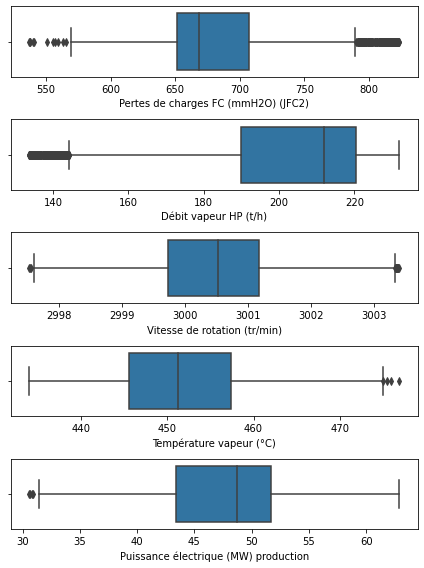

In [487]:
#  Vérification des valeurs aberrantes

fig, axs = plt.subplots(5, figsize = (6,8))

plt1 = sns.boxplot(df3['Pertes de charges FC (mmH2O) (JFC2)'], ax = axs[0])
plt2 = sns.boxplot(df3['Débit vapeur HP (t/h)'], ax = axs[1])
plt3 = sns.boxplot(df3['Vitesse de rotation (tr/min)'], ax = axs[2])
plt3 = sns.boxplot(df3['Température vapeur (°C)'], ax = axs[3])
plt3 = sns.boxplot(df3['Puissance électrique (MW) production'], ax = axs[4])

plt.tight_layout()

Conclusion: il y a beaucoup de valeurs aberrantes dans les données

# On va Tracer les relations par paires dans notre jeu de données.

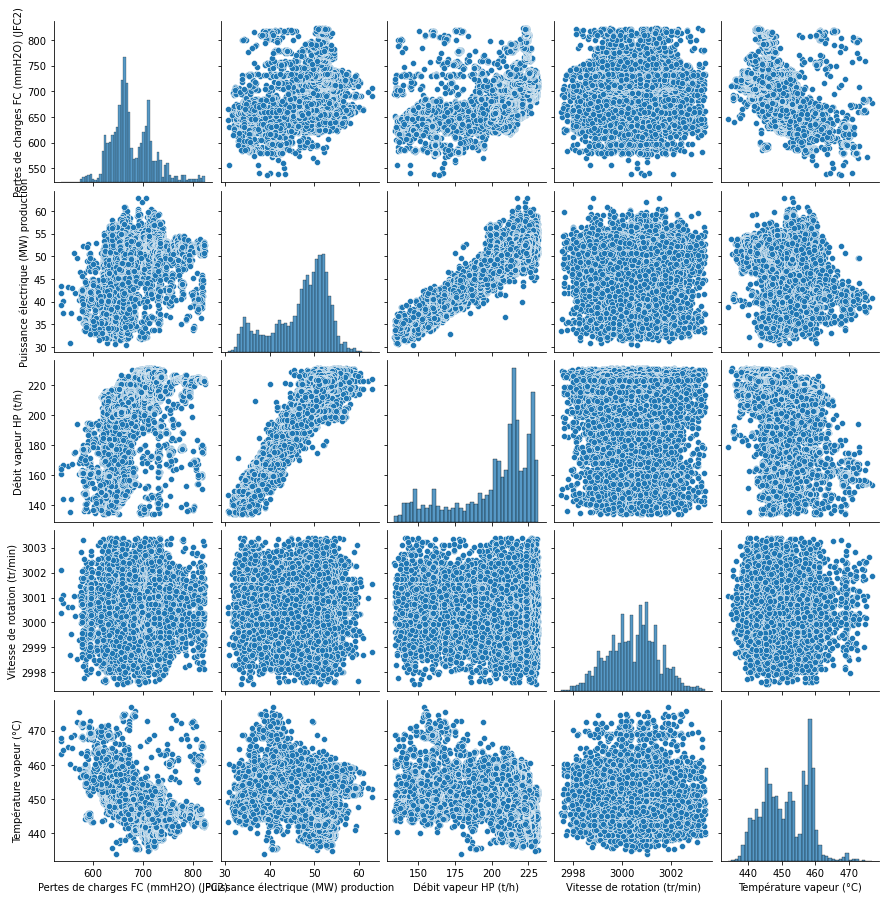

In [488]:
sns.pairplot(df3)

Comment la Puissance electrique produite est liée aux autres variables

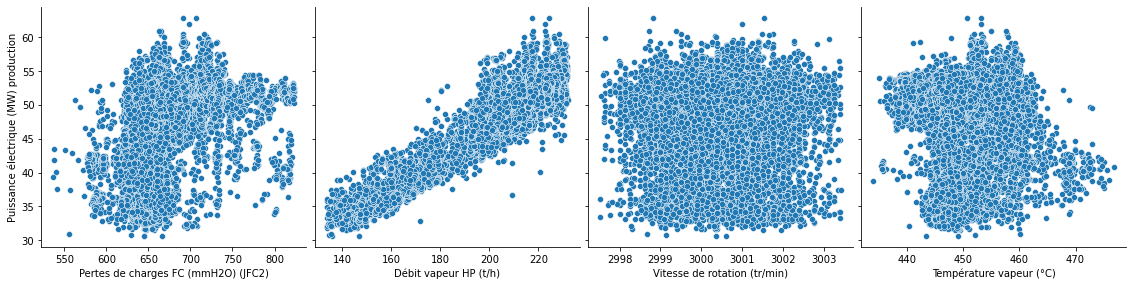

In [489]:
sns.pairplot(df3, x_vars=['Pertes de charges FC (mmH2O) (JFC2)', 'Débit vapeur HP (t/h)', 
                         'Vitesse de rotation (tr/min)', 'Température vapeur (°C)'], 
             y_vars='Puissance électrique (MW) production', height=4, aspect=1, kind='scatter')
plt.show()

On va afficher aussi un diagramme avec une estimation de la densité du noyau et un histogramme avec une taille de corbeille déterminée automatiquement avec une règle de référence

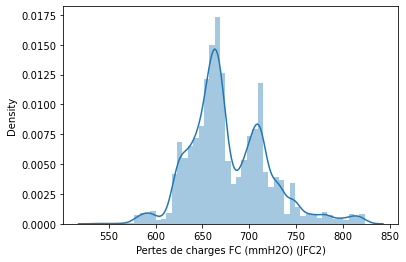

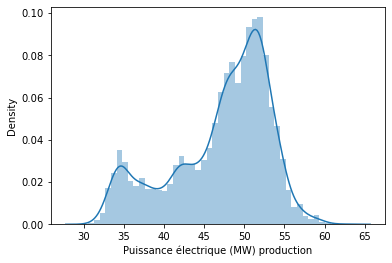

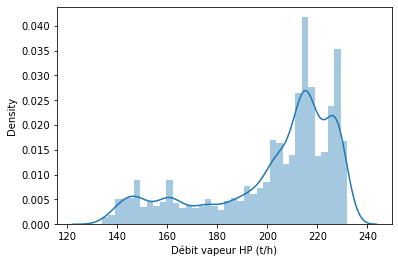

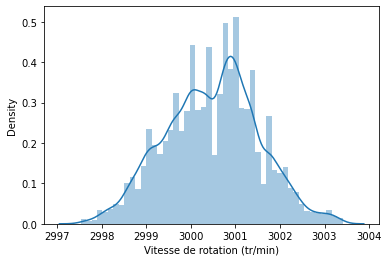

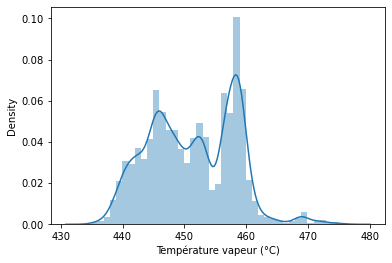

In [491]:
for col in df3.select_dtypes('float'):
    
    plt.figure()
    sns.distplot(df3[col])

Calculons maintenant la corrélation par paire des colonnes

In [546]:
df3.corr()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
Pertes de charges FC (mmH2O) (JFC2),1.000000,0.461267,0.490075,0.032765,-0.533825
Puissance électrique (MW) production,0.461267,1.000000,0.929064,-0.012705,-0.144188
Débit vapeur HP (t/h),0.490075,0.929064,1.000000,-0.022916,-0.211547
Vitesse de rotation (tr/min),0.032765,-0.012705,-0.022916,1.000000,-0.040060
Température vapeur (°C),-0.533825,-0.144188,-0.211547,-0.040060,1.000000


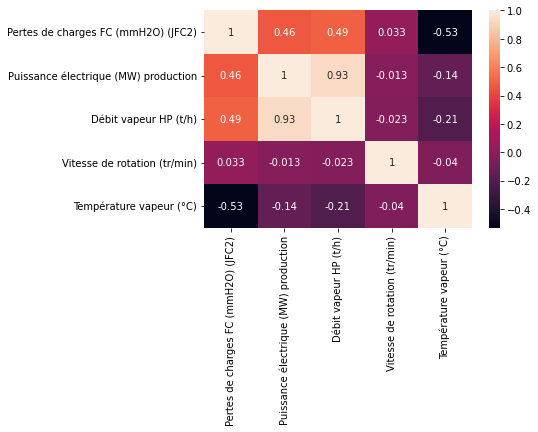

In [493]:
#matrice de confusion
#sns.heatmap((cor), annot = True)

sns.heatmap(df3.corr(), annot = True)
plt.show()

In [547]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [548]:
#Collecte des données

X = df3[['Débit vapeur HP (t/h)']]
y = df3['Puissance électrique (MW) production']

In [199]:
#trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [550]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)

(9887, 1)
(2472, 1)
(9887,)
(2472,)
(12359, 1)


In [165]:
#testset['Puissance électrique (MW) production'].value_counts()

In [551]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [262]:
#X_train, y_train = preprocessing(trainset)

In [552]:
# fit (entrainement)
model.fit(X_train, y_train)

LinearRegression()

In [553]:
#Printing the model coefficients

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 2.3368132652207763
Coefficient: [0.2217812]


In [554]:
print('Equation de regression: Puissance électrique (MW) production = 0.5869871337735759 + 0.23071378 * Débit vapeur HP (t/h)')

Equation de regression: Puissance électrique (MW) production = 0.5869871337735759 + 0.23071378 * Débit vapeur HP (t/h)


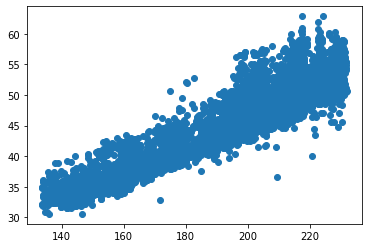

In [555]:
plt.scatter(X, y)

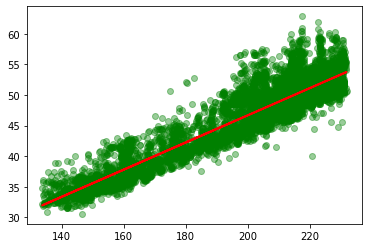

In [556]:
#Ligne de meilleur ajustement

plt.scatter(X_train, y_train, c='g', alpha=0.4)

y_pred = model.predict(X_train)
plt.plot(X_train, y_pred, c='r', linewidth=2)

In [558]:
#Prédiction du résultat de l'ensemble de test et d'entraînement  

y_pred= model.predict(X_test)  
y_pred_model= model.predict(X_test)  

In [559]:
print("Prediction pour testset: {}".format(y_pred))

Prediction pour testset: [52.85752236 50.30993197 40.3750506  ... 34.40309025 53.39407002
 52.68329809]


In [560]:
#Valeur réelle et valeur prédite

model_diff = pd.DataFrame({'Valeur réelle': y_test, 'Valeur prédite': y_pred_model, 'Différence': y_test-y_pred_model})
model_diff

,Valeur réelle,Valeur prédite,Différence
10564,53.865334,52.857522,1.007811
13736,51.036110,50.309932,0.726178
6987,39.556892,40.375051,-0.818158
1827,50.746563,49.509515,1.237048
7050,35.332390,34.632516,0.699874
...,...,...,...
5284,38.331585,38.719001,-0.387416
6695,34.679115,33.979345,0.699770
7555,31.919086,34.403090,-2.484004
10911,51.222599,53.394070,-2.171471


In [561]:
#Prédire pour n'importe quelle valeur

model.predict([[231]])

array([53.5682706])

In [562]:
# imprimer la valeur R au carré pour le modèle

from sklearn.metrics import accuracy_score

print('La valeur de R^2 du modèle: {:.2f}'.format(model.score(X,y)*100))

La valeur de R^2 du modèle: 86.32


In [563]:
# 0 signifie que le modèle est parfait. Par conséquent, la valeur doit être aussi proche de 0 que possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.7634461641238015
Mean Square Error: 5.128646688616131
Root Mean Square Error: 2.264651560089572


# Regression multiples

In [531]:
# Réglage de la valeur pour X et y

#X = df3[['Pertes de charges FC (mmH2O) (JFC2)', 'Débit vapeur HP (t/h)', 'Vitesse de rotation (tr/min)', 'Température vapeur (°C)']]
#y = df3['Puissance électrique (MW) production'].values.reshape(-1,1)

In [564]:
X1 = df3.drop(['Puissance électrique (MW) production'], axis=1).values

#ou bien
#X = df[['PC (mmH2O)']]
y1 = df3['Puissance électrique (MW) production'].values.reshape(-1,1)

X1.shape, y1.shape

((12359, 4), (12359, 1))

In [565]:
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size= 0.2, random_state=100)

In [566]:
pe = LinearRegression()  
pe.fit(X1_train, y1_train)

LinearRegression()

In [567]:
# Impression des coefficients du modèle

print(pe.intercept_)

# associer les noms des caractéristiques aux coefficients

list(zip(X, pe.coef_))

[-173.62294317]


[('Débit vapeur HP (t/h)',
  array([0.00758775, 0.21973034, 0.04666704, 0.06915332]))]

In [569]:
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((9887, 4), (9887, 1), (2472, 4), (2472, 1))

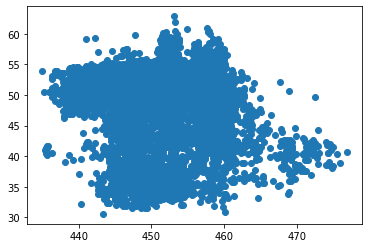

In [570]:
plt.scatter(X1_train[:,3], y1_train)

In [571]:
# Prédire le résultat de l'ensemble de test et d'entraînement

y_pred_pe= pe.predict(X1_test)  
X_pred_pe= pe.predict(X1_train)  

In [586]:
print("Prediction pour testset: {}".format(y_pred_pe))

Prediction pour testset: [[52.45633086]
 [49.99214407]
 [39.89177879]
 ...
 [34.1433294 ]
 [53.1346306 ]
 [52.41800917]]


In [587]:
# Valeur réelle et valeur prédite

pe_diff = pd.DataFrame({'Valeur réelle': y1_test, 'valeur prédite': y_pred_pe, 'Difference': y1_test-y_pred_pe,})
pe_diff

ValueError: If using all scalar values, you must pass an index

In [577]:
# Prédire pour n'importe quelle valeur

pe.predict([[712, 231, 3000, 450]])

array([[53.65736051]])

In [578]:
# imprimer la valeur R au carré pour le modèle

print('R squared value of the model: {:.2f}'.format(pe.score(X1, y1)*100))

R squared value of the model: 86.77


In [579]:
# 0 signifie que le modèle est parfait. Par conséquent, la valeur doit être aussi proche de 0 que possible

meanAbErr = metrics.mean_absolute_error(y1_test, y_pred_pe)
meanSqErr = metrics.mean_squared_error(y1_test, y_pred_pe)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_pe))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.7326828929077158
Mean Square Error: 4.952114825053289
Root Mean Square Error: 2.2253347669627797


In [128]:
#y_pred = pe.predict(X_test)

In [129]:
# Test (evaluation)
#pe.score(X_test, y_test)*100